In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('student-por.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

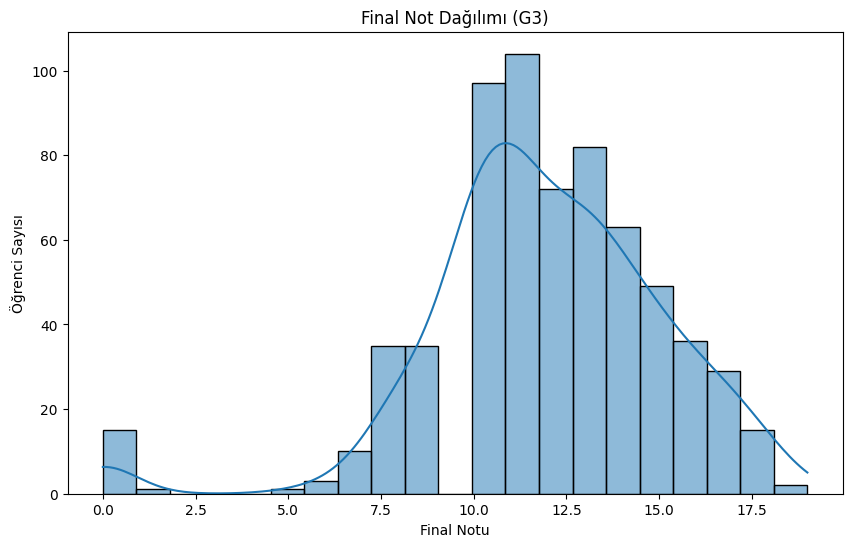

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(df['G3'], kde=True)
plt.title('Final Not Dağılımı (G3)')
plt.xlabel('Final Notu')
plt.ylabel('Öğrenci Sayısı')
plt.show()

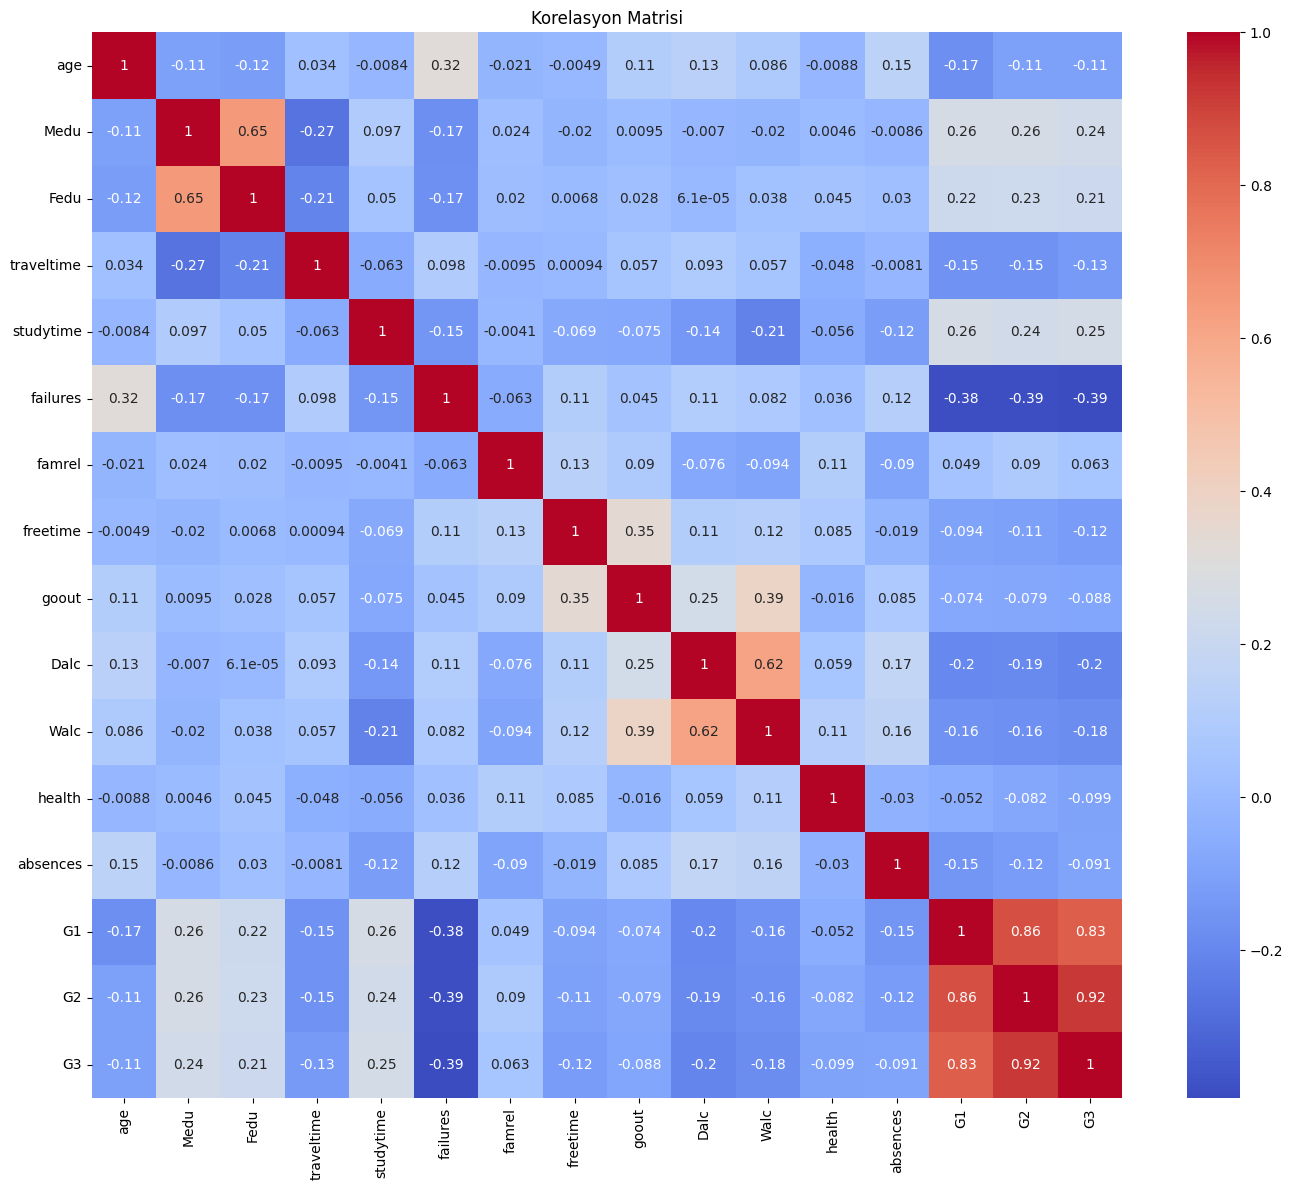

In [8]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()

### EDA

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [10]:
# Label encoder sıkıntı yaşatacağı için OneHotEncoder kullanıyoruz
# Neden label encoder kullanmadık?
# Label encoder, kategorik değişkenleri sayısal değerlere dönüştürürken
# sıralı bir ilişki varsayımı yapar bu bazı algoritmalar için sıkıntı olaqbiliyor

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = one_hot_encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(
    encoded_categorical, 
    columns=one_hot_encoder.get_feature_names_out(categorical_columns)
)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_columns:
    encoded_df[col] = df[col].values

df = encoded_df

df.head()

/home/taha/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,4,1,1,3,4,0,11,11
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5,3,3,1,1,3,2,9,11,11
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,3,2,2,3,3,6,12,13,12
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3,2,2,1,1,5,0,14,14,14
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,3,2,1,2,5,0,11,13,13


### X ve y

In [11]:
X = df.drop('G3', axis=1)  # G3 = final notu (hedef)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train boturu: {X_train.shape}")
print(f"Test boyutu: {X_test.shape}")

Train boturu: (454, 41)
Test boyutu: (195, 41)


In [12]:
# Ölçeklemeyi önce yapmıyoruz şu şekilde de yapabilirdik ama bazı modellerimiz
# için ölçekleme gerekse de bazı modellerimiz için gerekmez

scaler = StandardScaler()

# Çok fazla katagorik kolonumuz olduğu için burada sadece sayısal kolonlara
# ölçekleme yapıyoruz

numerical_features = []

for col in numeric_columns:
    if col != 'G3':
        numerical_features.append(col)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(X_train_scaled.head())

     school_MS  sex_M  address_U  famsize_LE3  Pstatus_T  Mjob_health  \
579        1.0    1.0        1.0          1.0        1.0          0.0   
211        0.0    1.0        0.0          1.0        1.0          0.0   
9          0.0    1.0        1.0          0.0        1.0          0.0   
612        1.0    1.0        0.0          0.0        1.0          0.0   
299        0.0    0.0        0.0          0.0        1.0          0.0   

     Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  ...  failures  \
579         0.0            0.0           0.0          0.0  ... -0.383276   
211         0.0            0.0           1.0          0.0  ... -0.383276   
9           1.0            0.0           0.0          0.0  ... -0.383276   
612         0.0            1.0           0.0          0.0  ...  1.289872   
299         1.0            0.0           0.0          0.0  ... -0.383276   

       famrel  freetime     goout      Dalc      Walc    health  absences  \
579  0.095112 -0.169875 -0.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# Regresyon modellerini tanımlama
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"\n{name} Modeli:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2: {r2:.4f}")


Linear Regression Modeli:
MSE: 1.4464
RMSE: 1.2027
R^2: 0.8692

Decision Tree Modeli:
MSE: 3.8000
RMSE: 1.9494
R^2: 0.6564

Random Forest Modeli:
MSE: 1.5172
RMSE: 1.2318
R^2: 0.8628

Gradient Boosting Modeli:
MSE: 1.5295
RMSE: 1.2367
R^2: 0.8617

KNN Modeli:
MSE: 3.1342
RMSE: 1.7704
R^2: 0.7166


### ANN 

In [14]:
#  results a ann i de ekledikten sonra en iyi model karşılaştırması 
# yapacğım

results

{'Linear Regression': {'model': LinearRegression(),
  'mse': 1.446376608994764,
  'rmse': 1.2026539855647442,
  'r2': 0.8692026118419498},
 'Decision Tree': {'model': DecisionTreeRegressor(),
  'mse': 3.8,
  'rmse': 1.9493588689617927,
  'r2': 0.6563619240593028},
 'Random Forest': {'model': RandomForestRegressor(),
  'mse': 1.5172246153846152,
  'rmse': 1.2317567192366419,
  'r2': 0.8627957506314122},
 'Gradient Boosting': {'model': GradientBoostingRegressor(),
  'mse': 1.5294594468575025,
  'rmse': 1.2367131627250931,
  'r2': 0.8616893416980433},
 'KNN': {'model': KNeighborsRegressor(),
  'mse': 3.1341538461538465,
  'rmse': 1.7703541583970837,
  'r2': 0.7165751059488306}}

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


def create_model():
    inputs = Input(shape=(X_train_scaled.shape[1],))

    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x) 
    x = BatchNormalization()(x)

    outputs = Dense(1, activation='linear')(x)


    model = Model(inputs=inputs, outputs=outputs)


    # compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer = optimizer,
                  loss = 'mean_squared_error',
                  metrics = ['mae'])

    return model


2025-05-22 17:51:26.157947: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 17:51:26.159984: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 17:51:26.195016: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 17:51:26.196205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 17:51:26.891222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [16]:
model = create_model()

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense (Dense)               (None, 64)                2688      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                             

2025-05-22 17:51:28.492595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-22 17:51:28.493083: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
# early stopping

early_stopping = EarlyStopping( monitor='val_loss',
                                patience=20,
                                restore_best_weights=True
)

Epoch 1/200
12/12 [==============================] - 1s 21ms/step - loss: 148.6351 - mae: 11.7766 - val_loss: 137.2957 - val_mae: 11.4317
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 145.7298 - mae: 11.6890 - val_loss: 134.6169 - val_mae: 11.3421
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 142.4630 - mae: 11.6245 - val_loss: 131.3953 - val_mae: 11.2246
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 140.1752 - mae: 11.5462 - val_loss: 128.0820 - val_mae: 11.1006
Epoch 5/200
12/12 [==============================] - 0s 18ms/step - loss: 137.4354 - mae: 11.4678 - val_loss: 125.2668 - val_mae: 10.9967
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 135.5778 - mae: 11.3936 - val_loss: 122.9617 - val_mae: 10.9128
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 133.0576 - mae: 11.2979 - val_loss: 120.5312 - val_mae: 10.8220
Epoch 8/200
12/12 [====================

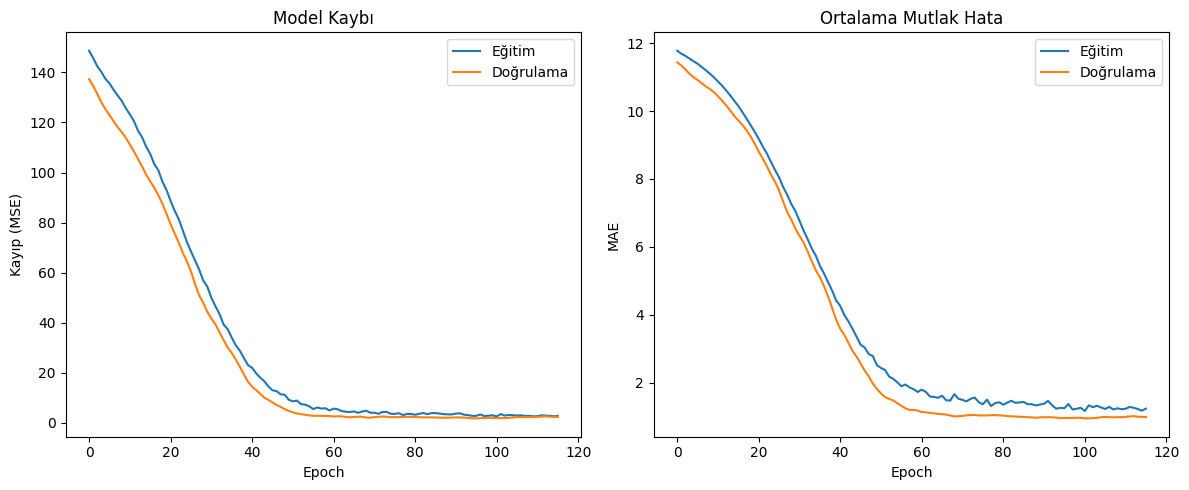

In [18]:
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp (MSE)')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Ortalama Mutlak Hata')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper right')
plt.tight_layout()
plt.show()

In [19]:
# Tahminler ile kontrol 

y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse}, RMSE : {rmse}, R^2 : {r2}")

7/7 [==============================] - 0s 1ms/step
MSE : 2.0245325769191185, RMSE : 1.4228607018675856, R^2 : 0.8169193475232244


In [20]:
# şimdi results dict e ekleyelim ve en iyi modeli kontrol edelim


results['Neural Network'] = {
    'model': model,
    'mse': mse,
    'rmse': rmse,
    'r2': r2
}

results

# En iyi modeli bulma

best_model_name = max(results, key=lambda x: results[x]['r2'])
print(f"En iyi model: {best_model_name}")

best_model_r2 = round(results[best_model_name]['r2'], 2)
best_model_r2

En iyi model: Linear Regression


0.87

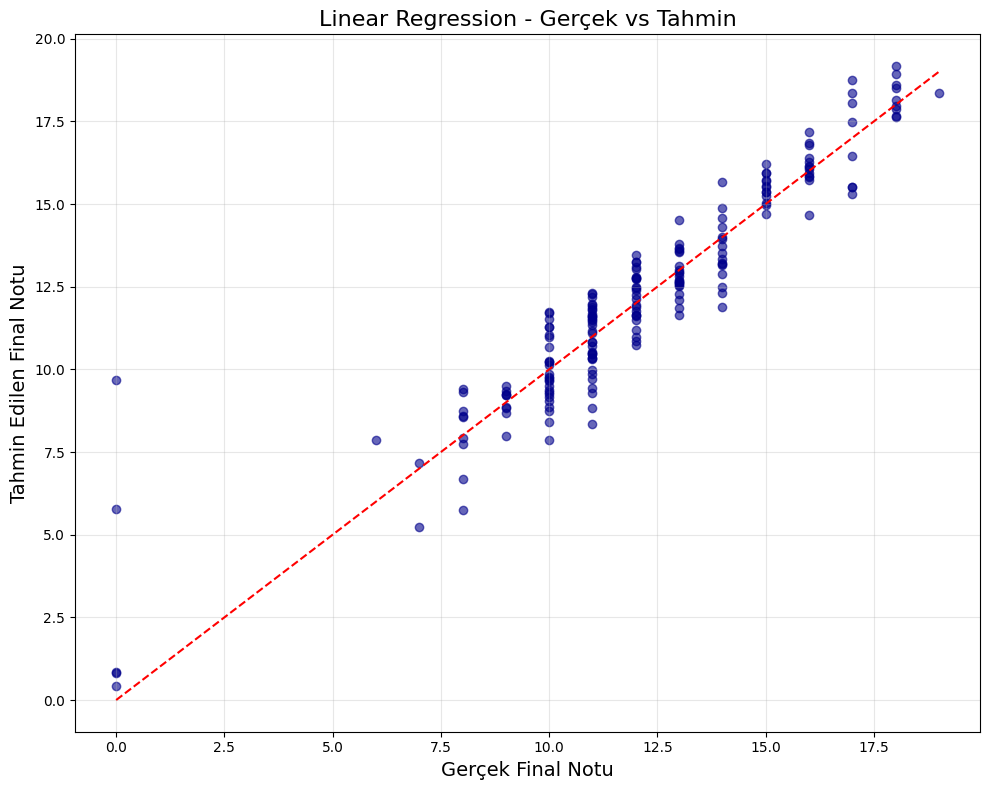

In [21]:
y_pred_best = results[best_model_name]['model'].predict(X_test_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='darkblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title(f'{best_model_name} - Gerçek vs Tahmin', fontsize=16)
plt.xlabel('Gerçek Final Notu', fontsize=14)
plt.ylabel('Tahmin Edilen Final Notu', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [22]:
param_grid = {
     'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
    
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    ) 

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [23]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [24]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_rf)


# Grid search yapmadan önceki sonuçlar ile çok da farkı yok yine de kontrol
# edeyim 
print(f"MSE : {mse}, RMSE : {rmse}, R^2 : {r2}\n")


random_forest_r2 = results['Random Forest']['r2']
best_rf_r2 = r2
# Neredeyse hiç fark yok 
print(f"En iyi random forest - İlk random forest farkı\n :{best_rf_r2 - random_forest_r2}")

MSE : 1.3702972907437068, RMSE : 1.17059698049487, R^2 : 0.8760825461952848

En iyi random forest - İlk random forest farkı
 :0.013286795563872578


In [25]:
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')


best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']

model_path = 'models/best_model.pkl'
joblib.dump(best_model, model_path)

scaler_path = 'models/scaler.pkl'
joblib.dump(scaler, scaler_path)

encoder_path = 'models/encoder.pkl'
joblib.dump(one_hot_encoder, encoder_path)

print(f"En iyi model ({best_model_name}) kaydedildi: {model_path}")
print(f"Scaler kaydedildi: {scaler_path}")
print(f"Encoder kaydedildi: {encoder_path}")

En iyi model (Linear Regression) kaydedildi: models/best_model.pkl
Scaler kaydedildi: models/scaler.pkl
Encoder kaydedildi: models/encoder.pkl
